<a href="https://colab.research.google.com/github/vita1787/ProG/blob/master/EDA_%D0%91%D1%83%D0%B9%D0%BD%D0%B5%D0%B2%D0%B8%D1%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Данные.Описание, скачивание

Информация об атрибутах:

В этом исследовании в качестве переменной ответа использовалась бинарная переменная, оплата по умолчанию (Да = 1, Нет = 0). В этом исследовании были рассмотрены литературные данные и использовались следующие 23 переменные в качестве объяснительных переменных:

LIMIT_BAL: Сумма данного кредита (в долларах США): она включает как индивидуальный потребительский кредит, так и его / ее семейный (дополнительный) кредит.

SEX: Пол (1 = мужчина; 2 = женщина).

EDUCATION: (1 = аспирантура; 2 = университет; 3 = старшая школа; 4 = другие).

MARRIADGE: Семейное положение (1 = женат; 2 = холост; 3 = другие).

AGE: возраст (год).

X6 - X11: история прошлых платежей. Мы отслеживали прошлые ежемесячные записи платежей (с апреля по сентябрь 2005 года) следующим образом: X6 = статус погашения в сентябре 2005 года; X7 = статус погашения в августе 2005 г .; , , .; X11 = статус погашения в апреле 2005 года. Шкала измерения статуса погашения: -1 = оплачивать должным образом; 1 = отсрочка платежа на один месяц; 2 = отсрочка платежа на два месяца; , , . 8 = отсрочка платежа на восемь месяцев; 9 = отсрочка платежа на девять месяцев и выше.

X12-X17: сумма выписки по счету (в долларах США). X12 = сумма выписки по счету в сентябре 2005 г .; X13 = сумма выписки по счету в августе 2005 г .; , , . X17 = сумма выписки по счету в апреле 2005 г.

X18-X23: сумма предыдущего платежа (в долларах США). X18 = сумма, уплаченная в сентябре 2005 года; X19 = сумма, уплаченная в августе 2005 года; , , .; X23 = сумма, уплаченная в апреле 2005 г.

In [263]:
!pip install pandas
!pip install numpy
!pip install matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [264]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
xl = pd.ExcelFile('/content/drive/My Drive/Colab Notebooks/default of credit card clients.xls')

In [0]:
df=xl.parse("Data",header=1)
#type=int

# Общее знакомство с данными

чтобы получить общее представление о данных, выгружаем первые 5 строк датасета.  


In [267]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [268]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

Столбец ID содержит уникальные значения и не нужен для дальнейшего анализа, столбец Education содержащит 7 уникальных значений, хотя должен содержать 4
столбец Marriage содержит 4 уникальных значения, хотя должен 3

In [0]:
df=df.drop(['ID'],axis=1)

Посмотрим есть ли в данных пропущенные значения Nan

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [0]:
#Добавим в данные столбец с средним за 6 месяцев платежом и остатком
df['mean_BILL']=(df['BILL_AMT1']+df['BILL_AMT1']+df['BILL_AMT1']+df['BILL_AMT1']+df['BILL_AMT1']+df['BILL_AMT1'])/6
df['mean_PAY']=(df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6'])/6

Общая стат-ая информация о данных

In [275]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,mean_BILL,mean_PAY
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,51223.330900,5275.232094
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,73635.860576,10137.946323
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,-165580.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,3558.750000,1113.291667
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,22381.500000,2397.166667
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,67091.000000,5583.916667
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,964511.000000,627344.333333


# Ошибочные данные, выбросы

Если посмотреть на таблицу выше,то можно заметить некоторые аномалии. В частности столбец "EDUCATION" имеет минимум и максимум 0 и 6, а в описании к данным указано, что значения в столбце принимают от 1 до 4-х. В столбце "MARRIAGE" значения могут принимать от 1 до 3, но минимум в столбце 0.
В столбцах PAY_0-PAY_6 значения от "-2" до "8" в описании от -1 до 9.
Кроме того в столбцах выписки по счету и платеже очень сильно отличаются среднее значение и медиана, что указывает на выбросы этих данных
Рассмотрим на графиках как рапределяются эти переменные 

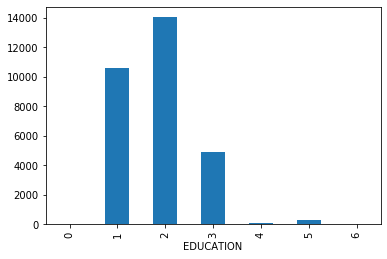

In [276]:
df.groupby(['EDUCATION'])['EDUCATION'].count().plot.bar()

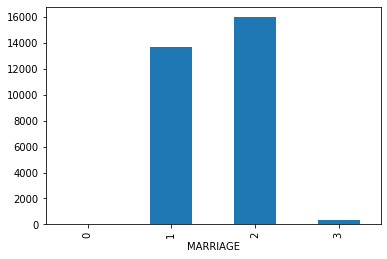

In [277]:
df.groupby(['MARRIAGE'])['MARRIAGE'].count().plot.bar()

Из указанных графиков видно, что значений, которые не удовлетворяют условиям относительно немного, скорее всего эти данные ошибочны. Два пути либо исключаем значения из выборки, либо заменяем на удовлетворяющее условиям значение класса, в частности и там и там есть значение, означающее "другое".
В обоих случаях есть минусы в первом случае теряется часть данных. Во втором случае будет некоторое искажение, так как полной уверенности в допущении нет.
В данном случае воспользуемся 2-м способом






In [0]:
#df=df[(df.EDUCATION!=6)&(df.EDUCATION!=5)&(df.EDUCATION!=0)&(df.MARRIAGE!=0)]
df.loc[df['EDUCATION']==5,'EDUCATION']=4
df.loc[df['EDUCATION']==6,'EDUCATION']=4
df.loc[df['EDUCATION']==0,'EDUCATION']=4
df.loc[df['MARRIAGE']==0,'MARRIAGE']=3
#or df['EDUCATION']==6 or df['EDUCATION']==0

Построим графики "ящик с усами" для столбцов mean_BILL, mean_PAYчтобы определить действительно ли есть выбросы

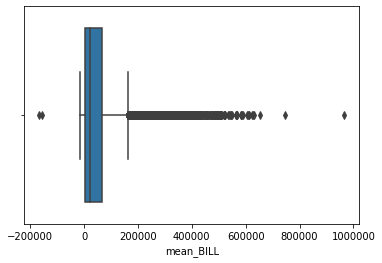

In [279]:
sns.boxplot(df['mean_BILL'])

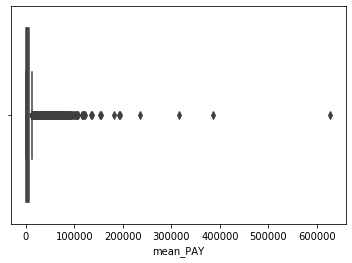

In [280]:
sns.boxplot(df['mean_PAY'])

По графику видно, что выбросы есть, особенно это выражено на графике среднего платежа, поробуем удалить из выборки выбросы через IQR

In [0]:
Q1=df['mean_PAY'].quantile(0.25)
Q3=df['mean_PAY'].quantile(0.75)
IQR= Q3-Q1
Min=Q1-1.5*IQR
Max=Q3+1.5*IQR
df1=df[(df['mean_PAY']>Min)&(df['mean_PAY']<Max)]

In [0]:
Q1=df['mean_BILL'].quantile(0.25)
Q3=df['mean_BILL'].quantile(0.75)
IQR= Q3-Q1
Min=Q1-1.5*IQR
Max=Q3+1.5*IQR
df1=df1[(df1['mean_BILL']>Min)&(df1['mean_BILL']<Max)]

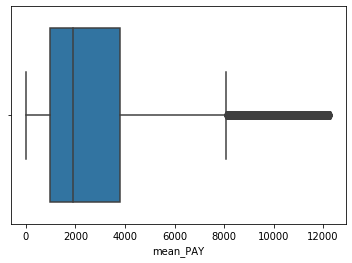

In [283]:
sns.boxplot(df1['mean_PAY'])

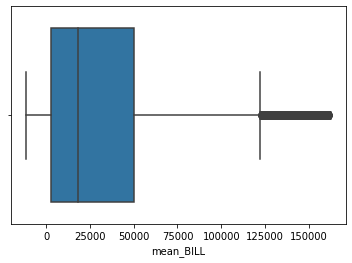

In [284]:
sns.boxplot(df1['mean_BILL'])

In [285]:
df1.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,mean_BILL,mean_PAY
count,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000
mean,144338.099376,1.608184,1.861245,1.564579,35.247413,0.007702,-0.120231,-0.154159,-0.215064,-0.266846,-0.297259,33655.081286,32129.656805,30379.985978,27927.105617,25985.985346,25076.502844,3114.320444,3036.540998,2738.580299,2534.306936,2503.137531,2454.423454,0.236117,33655.081286,2730.218277
std,116613.972470,0.488166,0.738663,0.522433,9.319235,1.142345,1.232725,1.241972,1.221103,1.185474,1.203391,38917.700411,38062.392073,36817.292411,34877.035362,33593.137218,33373.232075,4768.569195,4857.783073,4900.121729,4931.802285,4723.636988,4779.877548,0.424703,38917.700411,2539.866616
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-69777.000000,-46127.000000,-50616.000000,-53007.000000,-94625.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11545.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2562.250000,2087.500000,1724.500000,1449.000000,1051.250000,780.000000,536.250000,402.250000,246.000000,40.000000,0.000000,0.000000,0.000000,2562.250000,966.666667
50%,110000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18377.500000,17620.500000,17036.000000,15622.000000,13986.500000,12190.500000,2000.000000,1851.500000,1491.500000,1079.000000,1100.000000,1011.500000,0.000000,18377.500000,1885.916667
75%,200000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50447.000000,49131.750000,47090.000000,41148.500000,36252.000000,34302.000000,3816.750000,3545.500000,3008.000000,3000.000000,3000.000000,3000.000000,0.000000,50447.000000,3816.916667
max,800000.000000,2.000000,4.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,162296.000000,270596.000000,351026.000000,339599.000000,268084.000000,271388.000000,68800.000000,70000.000000,68600.000000,69000.000000,70500.000000,70200.000000,1.000000,162296.000000,12289.333333


In [286]:
print((1-(df1['LIMIT_BAL'].count())/(df['LIMIT_BAL'].count()))*100)
print(df1['mean_PAY'].mean()/df['mean_PAY'].mean())
print(df1['mean_BILL'].mean()/df['mean_BILL'].mean())

15.60666666666667
0.5175541526840308
0.6570264114948752


После удаления данных с выбросами видим, что в 15% данных в 2 раза снизило среднее значение по столбцу

# Графики количественных переменных

*Рассмотрим* Графики c колличественными переменными

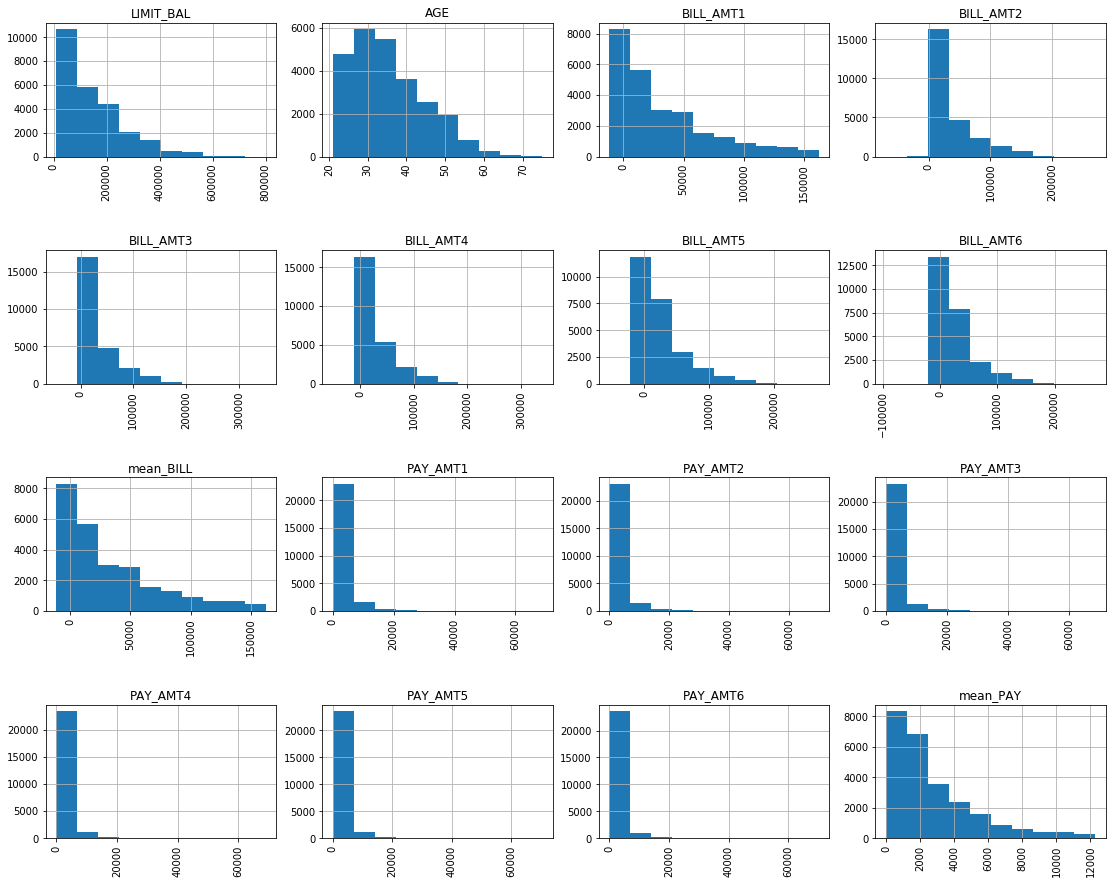

In [256]:
colm = ['LIMIT_BAL', 'AGE', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4',
        'BILL_AMT5','BILL_AMT6','mean_BILL','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
        'PAY_AMT5','PAY_AMT6','mean_PAY']
fig = plt.figure(figsize=(19,15))
cols =4
rows = 4
for i, column in enumerate(colm):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    df1[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

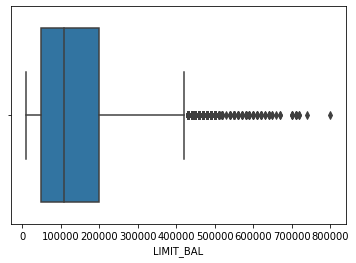

In [287]:
sns.boxplot(df1['LIMIT_BAL'])

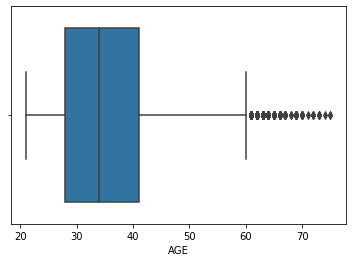

In [288]:
sns.boxplot(df1['AGE'])

Распределение данных на графиках, отлично от нормального. Основная масса заемщиков в датасете в возрасте от 28 до 42 лет, с кр.лимитом от 60 до 200000, при этом остаток по счету от 2500 до 50000 тысяч, при платеже от 1000 до 3800





# Графики номинативных переменных

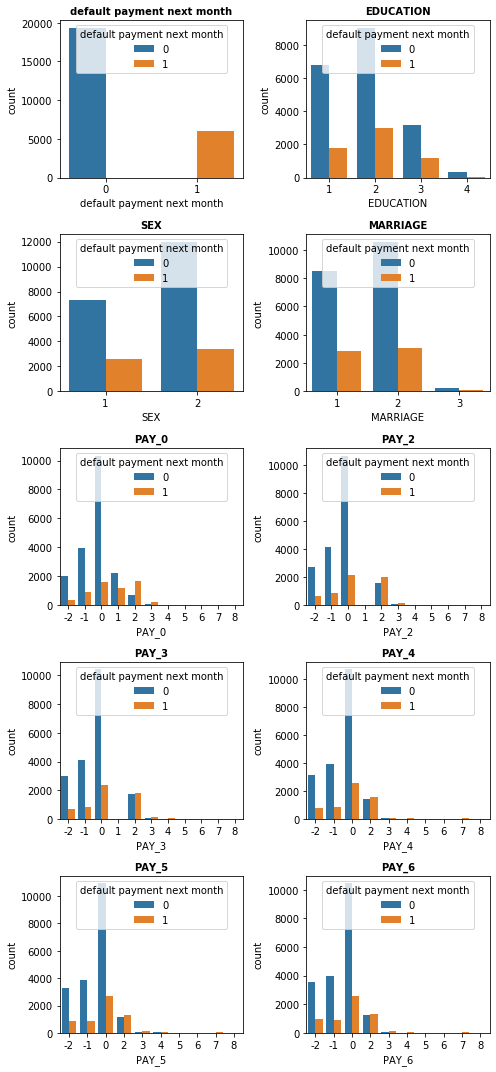

In [289]:
cols = ['default payment next month', 'EDUCATION', 'SEX', 'MARRIAGE',
        'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

nr_rows = 5
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(df1[cols[i]], hue=df1["default payment next month"], ax=ax)
        ax.set_title(cols[i], fontsize=10, fontweight='bold')
        ax.legend(title="default payment next month", loc='upper center') 
        
plt.tight_layout() 

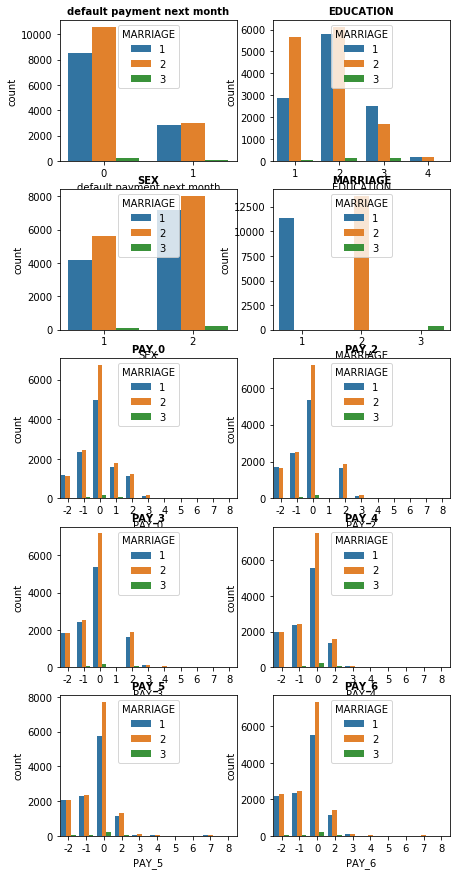

In [290]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(df1[cols[i]], hue=df1["MARRIAGE"], ax=ax)
        ax.set_title(cols[i], fontsize=10, fontweight='bold')
        ax.legend(title="MARRIAGE", loc='upper center') 

Графики представлены в виде сравнительных баров между классами относительно переменной,содержаший факт ополаты\неоплаты по кред.
Подавляющее большинстово клиентов оплатило кредит, образование и пол практически не связано с фактом оплаты. Возможно есть какая-то взаимосвязь между фактом оплаты и семейным положением, среди холостых относительно состоящих в браке примерно одинаковое число неплательщиков, при значительно большем кол-ве заплативших.Так же возможно есть взаимосвязь между уровнем обраования и семейным положением, большинство аспирантов холосты.Так же на уровень оплаты\не оплаты возможно влияет срок отсрочки платежа.Чем больше срок, тем меньше вероятность оплаты. 



#Матрица корреляций

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or w

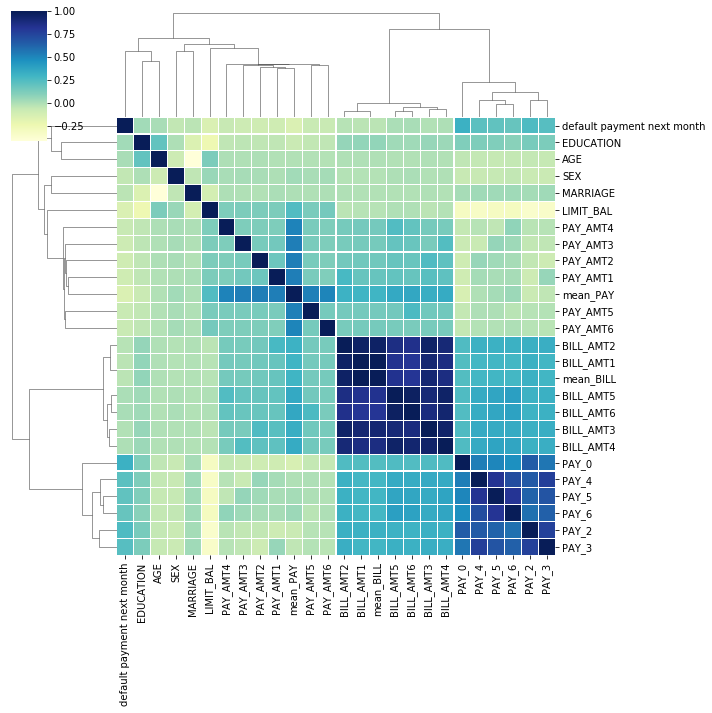

In [291]:
corrmat=df1.corr()
cg=sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels())
#.get_majorticklabels(),rotation=0

Более ярко выраженно коррелируют между собой блоки переменных Остаток, Платежи. Наиболее сильная линейная взаимосвязь переменной факт\оплаты неоплаты с реременной отсрочка платежа.
 

#Итог

Данные содержат 30000 строк

включают в себя 14 количественныхых переменных, 10 номинативных переменных

количественные содержат большое кол-во выбросов, распределение ненормальное

Для дальнейшего анализа нужно исключить из выборки значительную часть данных м нормализовать данные, либо использовать методы анализа устойчивые к выбросам(в частности группировку данных)



